In [36]:
import sys
sys.path
sys.path.append('../')

In [37]:
from torchvision import datasets, transforms
import src.actlearn as al

In [38]:
al.ActiveLearning.set_seed()

In [39]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используется устройство: {device}")

Используется устройство: cpu


In [40]:
train_mnist = datasets.MNIST('./data_AL', train=True, download=True)
test_mnist = datasets.MNIST('./data_AL', train=False, download=True)
train_fashion = datasets.FashionMNIST('./data_AL', train=True, download=True, transform=transforms.ToTensor())
test_fashion = datasets.FashionMNIST('./data_AL', train=False, download=True, transform=transforms.ToTensor())

X_train_mnist = train_mnist.data
y_train_mnist = train_mnist.targets
X_test_mnist = test_mnist.data
y_test_mnist = test_mnist.targets

X_train_fashion = train_fashion.data
y_train_fashion = train_fashion.targets
X_test_fashion = test_fashion.data
y_test_fashion = test_fashion.targets

alpha = 1
def reduce_dataset(X, y, alpha):
    n_samples = len(X)
    n_keep = int(alpha * n_samples)

    return X[:n_keep], y[:n_keep]

X_train_mnist, y_train_mnist = reduce_dataset(X_train_mnist, y_train_mnist, alpha)
X_test_mnist, y_test_mnist = reduce_dataset(X_test_mnist, y_test_mnist, alpha)
X_train_fashion, y_train_fashion = reduce_dataset(X_train_fashion, y_train_fashion, alpha)
X_test_fashion, y_test_fashion = reduce_dataset(X_test_fashion, y_test_fashion, alpha)
print(X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape)
print(X_train_fashion.shape, y_train_fashion.shape, X_test_fashion.shape, y_test_fashion.shape)

torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


In [41]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="incremental", update_size=128, batch_size=128, metric="f1")


In [42]:
AL1.fit()
AL2.fit()
AL3.fit()

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental entropy)
AL TRAINING FINISHED (incremental entropy)



Graph saved as incremental_RME_on_fashion-MNIST.pdf


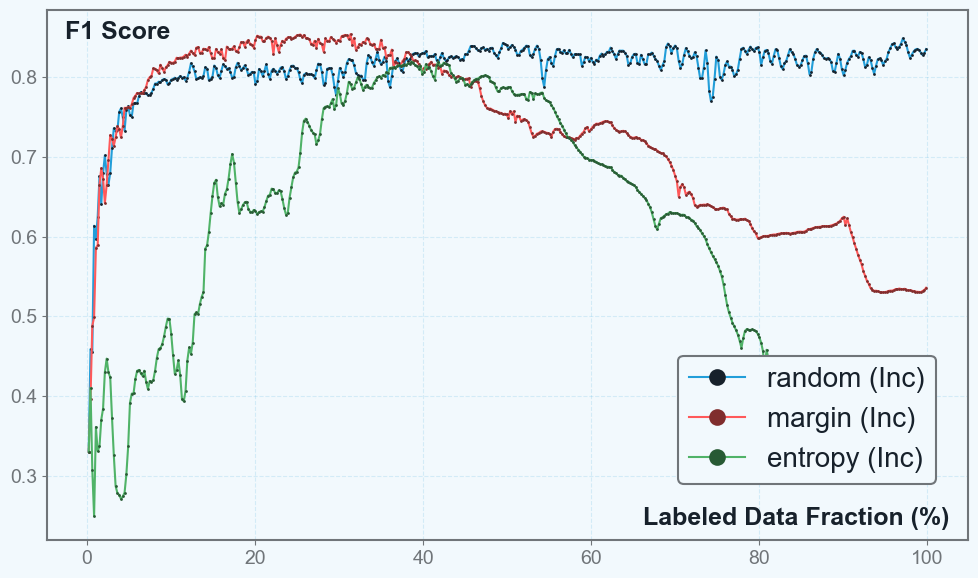

In [43]:
al.plot_active_learning_results_many(AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="incremental_RME_on_fashion-MNIST")

In [44]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="cumulative", update_size=512, batch_size=512, metric="f1", logs=True)
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=512, batch_size=512, metric="f1", logs=True)
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="cumulative", update_size=512, batch_size=512, metric="f1", logs=True)

In [45]:
AL1.fit()
AL2.fit()
AL3.fit()

AL TRAINING STARTED (cumulative random)
Training AL: cumulative random | Доля: 0.213
Training AL: cumulative random | Доля: 1.067
Training AL: cumulative random | Доля: 1.920
Training AL: cumulative random | Доля: 2.773
Training AL: cumulative random | Доля: 3.627
Training AL: cumulative random | Доля: 4.480
Training AL: cumulative random | Доля: 5.333
Training AL: cumulative random | Доля: 6.187
Training AL: cumulative random | Доля: 7.040
Training AL: cumulative random | Доля: 7.893
Training AL: cumulative random | Доля: 8.747
Training AL: cumulative random | Доля: 9.600
Training AL: cumulative random | Доля: 10.453
Training AL: cumulative random | Доля: 11.307
Training AL: cumulative random | Доля: 12.160
Training AL: cumulative random | Доля: 13.013
Training AL: cumulative random | Доля: 13.867
Training AL: cumulative random | Доля: 14.720
Training AL: cumulative random | Доля: 15.573
Training AL: cumulative random | Доля: 16.427
Training AL: cumulative random | Доля: 17.280
Traini

Graph saved as cumulative_RME_on_fashion-MNIST.pdf


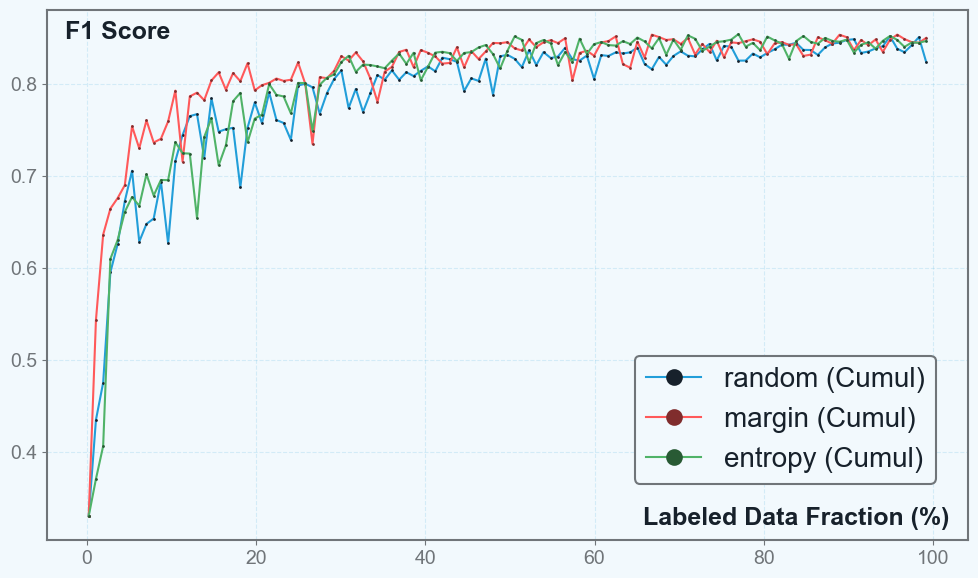

In [46]:
al.plot_active_learning_results_many(AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="cumulative_RME_on_fashion-MNIST")

In [47]:
n_epochs=3

AL1 = al.ActiveLearning(al.ANN(hidden_dim=10), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)
AL2 = al.ActiveLearning(al.ANN(hidden_dim=100), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)
AL3 = al.ActiveLearning(al.ANN(hidden_dim=1000), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)

In [48]:
AL1.fit()
AL2.fit()
AL3.fit()

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)



Graph saved as incremental_NEURONS_on_fashion-MNIST.pdf


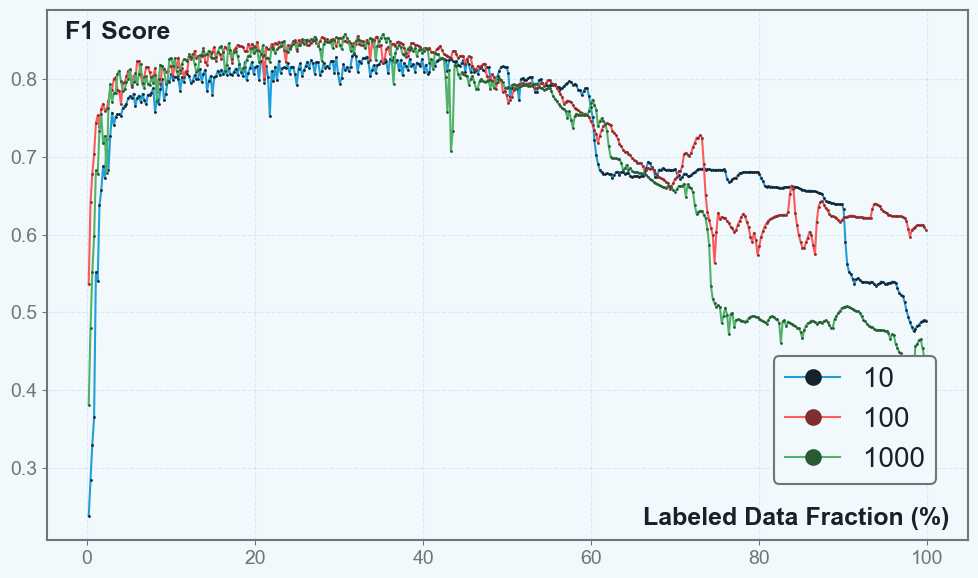

In [49]:
al.plot_active_learning_results_many(
    AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="incremental_NEURONS_on_fashion-MNIST",
    legend=['10', '100', '1000']
    )

In [50]:
AL1 = al.ActiveLearning(al.ANN(hidden_dim=10), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=512, batch_size=512, metric="f1", logs=True)
AL2 = al.ActiveLearning(al.ANN(hidden_dim=100), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=512, batch_size=512, metric="f1", logs=True)
AL3 = al.ActiveLearning(al.ANN(hidden_dim=1000), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=512, batch_size=512, metric="f1", logs=True)

In [51]:
AL1.fit()
AL2.fit()
AL3.fit()

AL TRAINING STARTED (cumulative margin)
Training AL: cumulative margin | Доля: 0.213
Training AL: cumulative margin | Доля: 1.067
Training AL: cumulative margin | Доля: 1.920
Training AL: cumulative margin | Доля: 2.773
Training AL: cumulative margin | Доля: 3.627
Training AL: cumulative margin | Доля: 4.480
Training AL: cumulative margin | Доля: 5.333
Training AL: cumulative margin | Доля: 6.187
Training AL: cumulative margin | Доля: 7.040
Training AL: cumulative margin | Доля: 7.893
Training AL: cumulative margin | Доля: 8.747
Training AL: cumulative margin | Доля: 9.600
Training AL: cumulative margin | Доля: 10.453
Training AL: cumulative margin | Доля: 11.307
Training AL: cumulative margin | Доля: 12.160
Training AL: cumulative margin | Доля: 13.013
Training AL: cumulative margin | Доля: 13.867
Training AL: cumulative margin | Доля: 14.720
Training AL: cumulative margin | Доля: 15.573
Training AL: cumulative margin | Доля: 16.427
Training AL: cumulative margin | Доля: 17.280
Traini

Graph saved as cumulative_NEURONS_on_fashion-MNIST.pdf


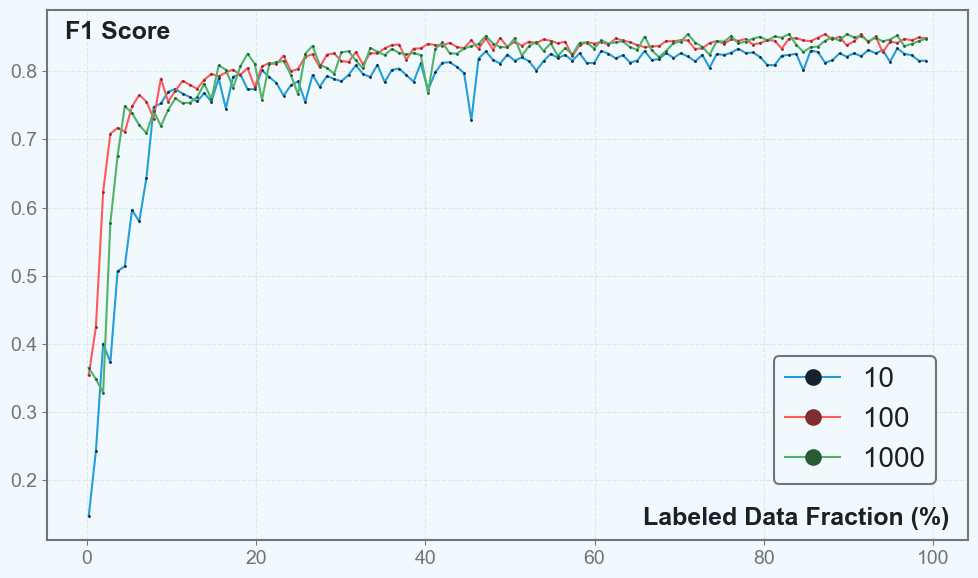

In [52]:
al.plot_active_learning_results_many(
    AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="cumulative_NEURONS_on_fashion-MNIST",
    legend=['10', '100', '1000']
    )

In [53]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")

In [54]:
AL1.fit()

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)



Graph saved as incremental_M_SINGLE_on_fashion-MNIST.pdf


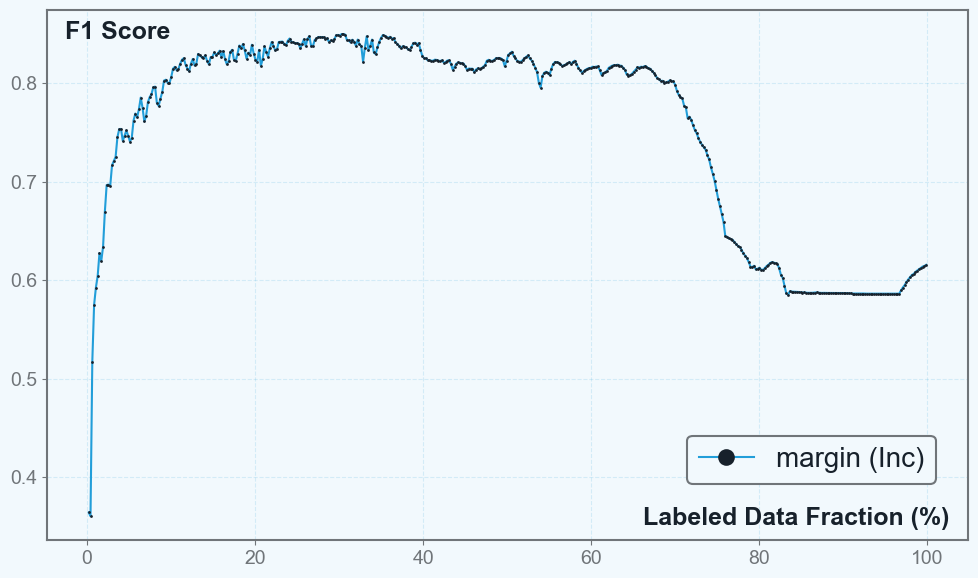

In [55]:
al.plot_active_learning_results_many(AL1, dataset_name="Fashion-MNIST", name="incremental_M_SINGLE_on_fashion-MNIST")

In [56]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=24)

In [57]:
AL1.fit()

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)



Graph saved as incremental_M_SKIP_SIZE_on_fashion-MNIST.pdf


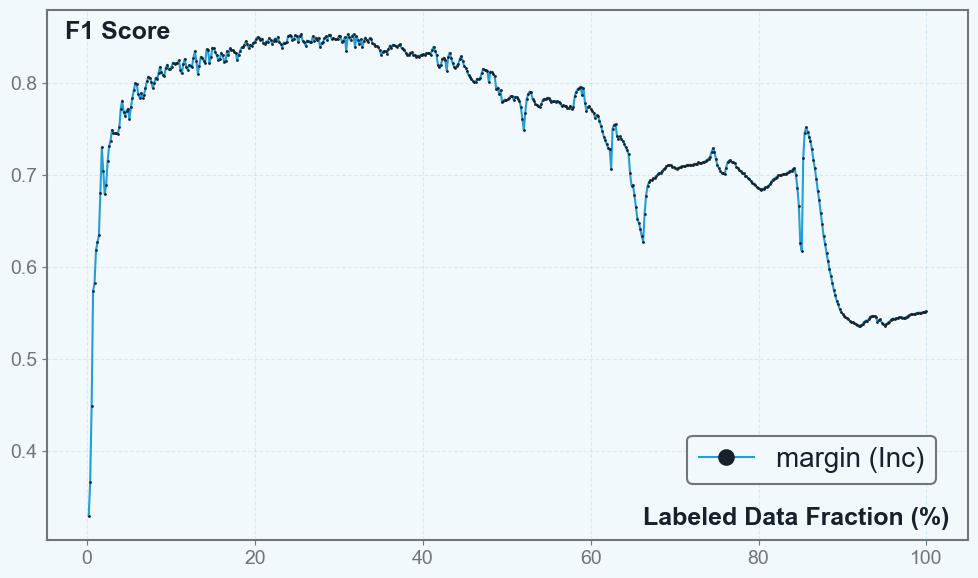

In [58]:
al.plot_active_learning_results_many(AL1, dataset_name="Fashion-MNIST", name="incremental_M_SKIP_SIZE_on_fashion-MNIST")